Import Necessary Libraries

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

Define Source function:

In [2]:
def source_term(X, Y):
    S = 2 * np.pi**2 * ((np.sin(np.pi * Y))**2 * np.cos(2 * np.pi * X) +
            (np.sin(np.pi * X))**2 * np.cos(2 * np.pi * Y))
    return S

Define Boundary Conditions:

In [3]:
def boundary_condition(x, y):
    """
    Define the boundary condition here.
    Example: Homogeneous Dirichlet (u = 0):
    """
    u_boundary = np.zeros_like(x)
    u_boundary[0, :] = 0      # Bottom boundary
    u_boundary[-1, :] = 0    # Top boundary
    u_boundary[:, 0] = 0      # Left boundary
    u_boundary[:, -1] = 0    # Right boundary
    
    return u_boundary

Define the solver based on explaind procedure:

In [4]:
def solver(grid_n, source_term= source_term, boundary_condition= boundary_condition):
    Lx, Ly = 1.0, 1.0  # Domain size
    grid_number = grid_n    # Number of grid points
    Nx, Ny = grid_number, grid_number  
    hx, hy = Lx / (Nx - 1), Ly / (Ny - 1)  # Grid spacing

    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    main_diag = -4 * np.ones((Nx - 2) * (Ny - 2))
    off_diag = np.ones((Nx - 2) * (Ny - 2) - 1)
    off_diag2 = np.ones((Nx - 2) * (Ny - 2) - (Nx - 2))

    diagonals = [main_diag, off_diag, off_diag, off_diag2, off_diag2]
    offsets = [0, 1, -1, Nx - 2, -(Nx - 2)]
    A = diags(diagonals, offsets, format='csr') / hx**2

    f = source_term(X,Y)

    b_matrix = np.zeros_like(X)  # Initialize the matrix for boundary contributions
    b_matrix[1:-1, 1:-1] = f[1:-1, 1:-1]  # Add the source term for interior points

    u_boundry = boundary_condition(X,Y)
    new_f = b_matrix + u_boundry
    b = new_f[1:-1, 1:-1].flatten()

    u_flat = spsolve(A, b)

    u = np.zeros((Nx, Ny))
    u[1:-1, 1:-1] = u_flat.reshape((Nx - 2, Ny - 2))

    return X, Y, u

Define the exact solution function:

In [5]:
def exact_solution(x, y):
    """
    Exact solution u(x, y) = sin^2(pi * x) * sin^2(pi * y).
    """
    return np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2

Calculate numerical solution and relative error:

In [17]:
# grids = [10, 20, 40, 80]
grids = np.logspace(1.0,3.0, num=10, dtype=int)
errors = []
step_sizes = []
times = []

for grid in grids:
    step_size = 1 / grid
    step_sizes.append(step_size)

    start_time = time.time()
    X, Y , u = solver(grid)
    end_time = time.time()

    times.append(end_time - start_time)

    u_exact = exact_solution(X,Y)
    error = np.max(np.abs((u - u_exact) / (u_exact + 1e-12)))  # Maximum norm error
    errors.append(error)
    

Plot the numerical solution:

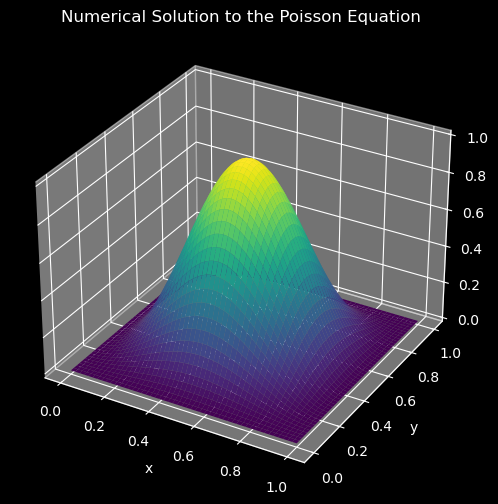

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_title("Numerical Solution to the Poisson Equation")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Plot the log-log error

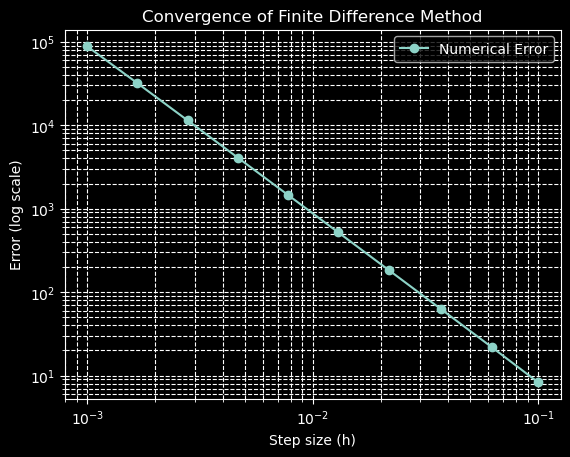

In [19]:
plt.figure()
plt.loglog(step_sizes, errors, marker='o', label='Numerical Error')
plt.title('Convergence of Finite Difference Method')
plt.xlabel('Step size (h)')
plt.ylabel('Error (log scale)')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

Plot Convergence of the Finite Difference Method

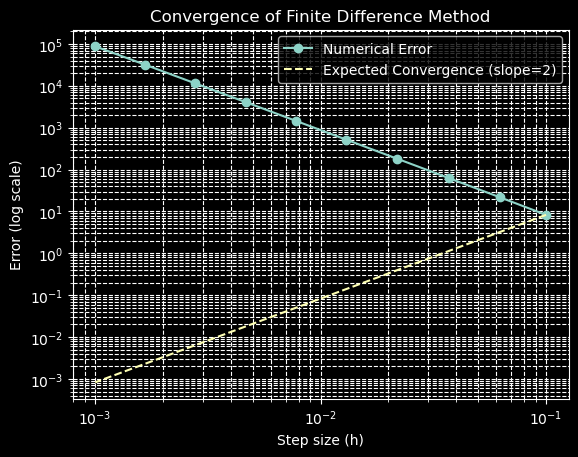

In [22]:
plt.figure()
plt.loglog(step_sizes, errors, marker='o', label='Numerical Error')
ref_line = [errors[0] * (s / step_sizes[0])**2 for s in step_sizes]
plt.loglog(step_sizes, ref_line, linestyle='--', label='Expected Convergence (slope=2)')
plt.title('Convergence of Finite Difference Method')
plt.xlabel('Step size (h)')
plt.ylabel('Error (log scale)')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

Plot the Computational time vs Grids

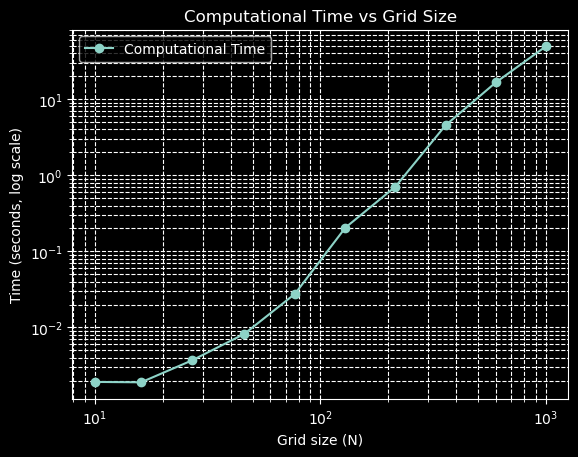

In [23]:
plt.figure()
plt.loglog(grids, times, marker='o', label='Computational Time')
plt.title('Computational Time vs Grid Size')
plt.xlabel('Grid size (N)')
plt.ylabel('Time (seconds, log scale)')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()